using device cpu


100%|██████████| 30/30 [02:31<00:00,  5.05s/it]


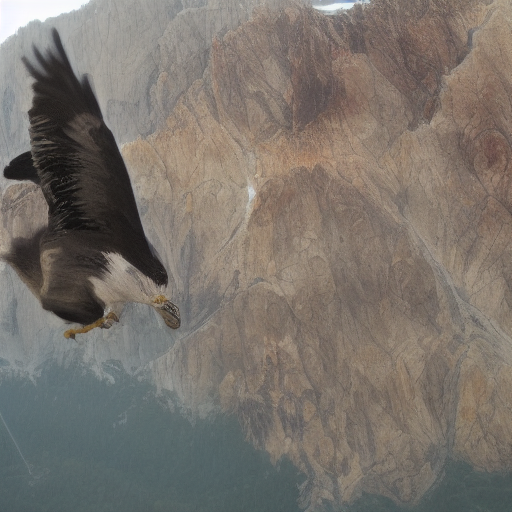

In [3]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer

import torch

import warnings

warnings.simplefilter("ignore", category=UserWarning)  # Suppress UserWarnings

DEVICE = 'cpu'

if torch.cuda.is_available():
    DEVICE = 'cuda'

# not enough memory
DEVICE = 'cpu'

print(f'using device {DEVICE}')

tokenizer = CLIPTokenizer('data/vocab.json', 'data/merges.txt')
model_file = 'data/v1-5-pruned-emaonly.ckpt'
models = model_loader.preload_models_from_std_weights(model_file, DEVICE)

# TEXT TO IMAGE

prompt = 'An eagle flying in the mountains, highly detailed, cinematic, 4k resolution'
uncond_prompt = ""
do_cfg = True
cfg_scale = 0.7

# IMAGE TO IMAGE 

image_path = 'images/eagle.jpeg'
input_image = Image.open(image_path)
strength = 0.9
input_image = None

## SAMPLER

sampler = "ddpm"
num_inference_steps = 30
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)


# Combine the input image and the output image into a single image.
# There are some problems with the decoding
Image.fromarray(output_image)
